### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
del application_df["EIN"]
del application_df["NAME"]
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_value_counts = application_df["APPLICATION_TYPE"].value_counts()
application_value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

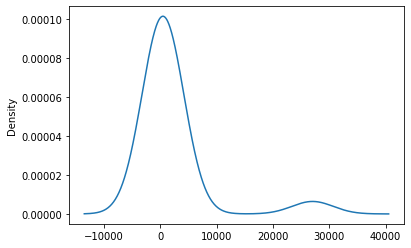

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_value_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_value_counts[application_value_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
application_classification_count = application_df["CLASSIFICATION"].value_counts()
application_classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

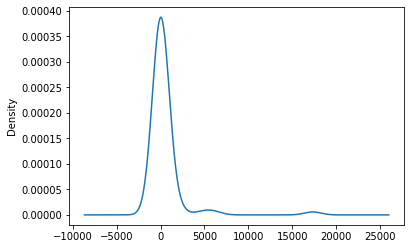

In [8]:
# Visualize the value counts of CLASSIFICATION
application_classification_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(application_classification_count[application_classification_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
bins = application_df.CLASSIFICATION.value_counts()
bins

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

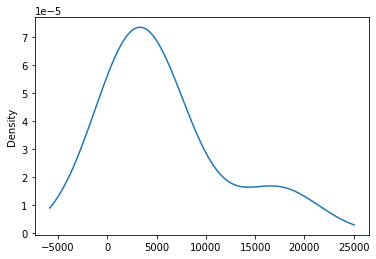

In [10]:
bins.plot.density()

In [11]:
# Generate our categorical variable lists
application_category = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_category

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
application_df.tail(30)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34269,T10,Independent,C1000,Preservation,Association,1,0,N,5000,1
34270,T3,CompanySponsored,C1000,Preservation,Trust,1,0,N,5000,1
34271,T3,Independent,C2000,Preservation,Trust,1,100000-499999,N,20881,0
34272,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,9043,1
34273,T3,CompanySponsored,C2000,Preservation,Trust,1,0,N,5000,1
34274,T3,CompanySponsored,C2000,Preservation,Trust,1,0,N,5000,0
34275,T3,CompanySponsored,C1000,Preservation,Trust,1,0,N,5000,0
34276,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,152764,0
34277,T8,Family/Parent,C1000,CommunityServ,Trust,1,0,N,5000,1
34278,T3,Independent,C1000,Preservation,Trust,1,25000-99999,N,8749,0


In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_category]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_category)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
new_application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(columns = application_category)
new_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = new_application_df.IS_SUCCESSFUL
X = new_application_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 150
hidden_nodes_layer2 = 75

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               6600      
                                                                 
 dense_1 (Dense)             (None, 75)                11325     
                                                                 
 dense_2 (Dense)             (None, 75)                5700      
                                                                 
 dense_3 (Dense)             (None, 75)                5700      
                                                                 
 dense_4 (Dense)             (None, 75)                5700      
                                                                 
 dense_5 (Dense)             (None, 1)                 76        
                                                                 
Total params: 35,101
Trainable params: 35,101
Non-traina

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= "epoch")

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
757/804 [===========================>..] - ETA: 0s - loss: 0.5740 - accuracy: 0.7202
Epoch 00001: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 1s 898us/step - loss: 0.5738 - accuracy: 0.7200
Epoch 2/100
753/804 [===========================>..] - ETA: 0s - loss: 0.5564 - accuracy: 0.7311
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 887us/step - loss: 0.5567 - accuracy: 0.7311
Epoch 3/100
754/804 [===========================>..] - ETA: 0s - loss: 0.5540 - accuracy: 0.7330
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 886us/step - loss: 0.5531 - accuracy: 0.7325
Epoch 4/100
756/804 [===========================>..] - ETA: 0s - loss: 0.5510 - accuracy: 0.7324
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 887us/step - loss: 0.5513 - accuracy: 0.7319
Epoch 5/100
748/804 

776/804 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7405
Epoch 00034: saving model to checkpoints\weights.34.hdf5
804/804 [==============================] - 1s 913us/step - loss: 0.5370 - accuracy: 0.7399
Epoch 35/100
796/804 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7401
Epoch 00035: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 1s 921us/step - loss: 0.5367 - accuracy: 0.7400
Epoch 36/100
794/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7397
Epoch 00036: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 1s 924us/step - loss: 0.5362 - accuracy: 0.7399
Epoch 37/100
788/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7402
Epoch 00037: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 1s 927us/step - loss: 0.5360 - accuracy: 0.7406
Epoch 38/100
793/804 [=======

794/804 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7422
Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 1s 915us/step - loss: 0.5325 - accuracy: 0.7419
Epoch 68/100
796/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7422
Epoch 00068: saving model to checkpoints\weights.68.hdf5
804/804 [==============================] - 1s 915us/step - loss: 0.5335 - accuracy: 0.7420
Epoch 69/100
798/804 [============================>.] - ETA: 0s - loss: 0.5342 - accuracy: 0.7417
Epoch 00069: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7413
Epoch 70/100
791/804 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7401
Epoch 00070: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 935us/step - loss: 0.5333 - accuracy: 0.7401
Epoch 71/100
791/804 [=========

787/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7410
Epoch 00100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================] - 1s 931us/step - loss: 0.5333 - accuracy: 0.7411


In [20]:
history_df = pd.DataFrame(fit_model.history)
history_df.index +=1

history_df

,loss,accuracy
1,0.573769,0.720028
2,0.556717,0.731068
3,0.553091,0.732507
4,0.551316,0.731924
5,0.549725,0.732507
...,...,...
96,0.535318,0.740087
97,0.534838,0.741409
98,0.537601,0.739893
99,0.535319,0.740981


<AxesSubplot:>

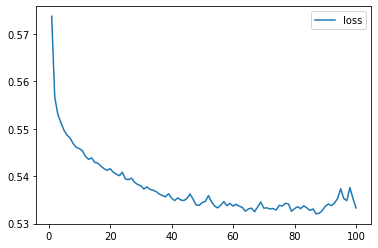

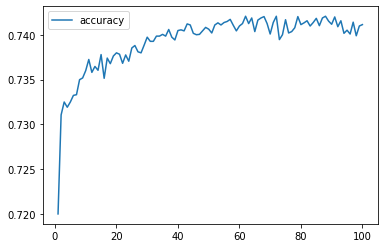

In [21]:
history_df.plot(y="loss")
history_df.plot(y="accuracy")

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5651 - accuracy: 0.7241 - 226ms/epoch - 842us/step
Loss: 0.5651195049285889, Accuracy: 0.7240816354751587
